**Week-3:** Design Deep forward Neural Network for image classification
- Design and implement an Image classification model to classify a dataset of images using Deep
   Feed Forward NN.
- Use the MNIST datasets.
- Record the accuracy corresponding to the number of epochs 5, 50, 100.
- Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.


MNIST Dataset: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

CIFAR10 and CIFAR100 Datasets(University of Toronto): https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR10 Dataset (Kaggle): https://www.kaggle.com/c/cifar-10/

Fashion MNIST Dataset(Kaggle): https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [2]:
#load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


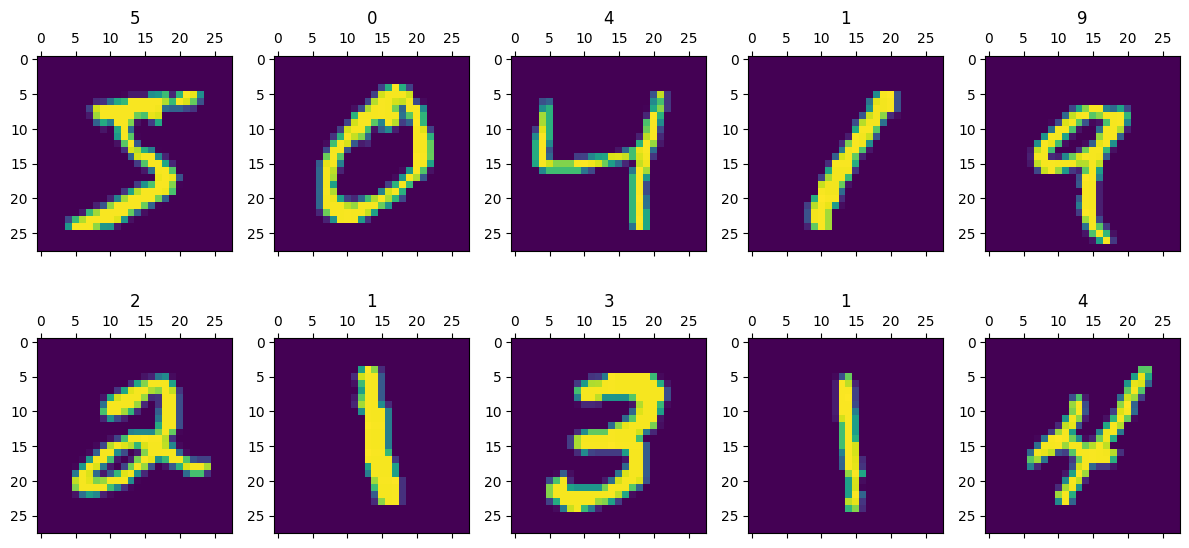

In [8]:
# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6),
facecolor='white')
n=0
for i in range(0,2):
  for j in range(0,5):
    axs[i,j].matshow(X_train[n])
    axs[i,j].set(title=y_train[n])
    n=n+1
plt.show()


In [36]:
# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

In [35]:
# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


In [11]:
#Design the Deep FF Neural Network architecture
model = Sequential(name="DFF-Model") # Model
model.add(Input(shape=(784,), name='Input-Layer')) # Input Layer - need to specify the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer-1',
kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2',
kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3',
kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

In [12]:
#Compile keras model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',
metrics=['Accuracy'], loss_weights=None, weighted_metrics=None, run_eagerly=None,
steps_per_execution=None)

In [21]:
#Compile keras model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',
metrics=['Accuracy'], loss_weights=None, weighted_metrics=None, run_eagerly=None,
steps_per_execution=1) # set steps_per_execution=1

In [22]:
#Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=5, verbose='auto', callbacks=None,
validation_split=0.2, shuffle=True, class_weight=None, sample_weight=None,
initial_epoch=0)

Epoch 1/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - Accuracy: 0.8668 - loss: 0.4267 - val_Accuracy: 0.9604 - val_loss: 0.1309
Epoch 2/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - Accuracy: 0.9659 - loss: 0.1134 - val_Accuracy: 0.9671 - val_loss: 0.1100
Epoch 3/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - Accuracy: 0.9745 - loss: 0.0821 - val_Accuracy: 0.9623 - val_loss: 0.1332
Epoch 4/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - Accuracy: 0.9794 - loss: 0.0645 - val_Accuracy: 0.9714 - val_loss: 0.1100
Epoch 5/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - Accuracy: 0.9849 - loss: 0.0477 - val_Accuracy: 0.9696 - val_loss: 0.1178


In [23]:
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train),axis=1))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [24]:
# Predict class labels on a test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test),axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
#Model Performance Summary
print("")
print(' Model Summary')
model.summary()
print("")


 Model Summary


Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)

In [27]:
#print("Layer: ", layer.name) # print layer name
#print(" --Kernels (Weights): ", layer.get_weights()[0]) # kernels (weights)
#print(" --Biases: ", layer.get_weights()[1]) # biases
print("")
print('---------- Evaluation on Training Data -----------')
print(classification_report(y_train, pred_labels_tr))
print("")
print('---------- Evaluation on Test Data -----------')
print(classification_report(y_test, pred_labels_te))
print("")


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5923
           1       0.99      0.98      0.99      6742
           2       0.96      1.00      0.98      5958
           3       0.99      0.96      0.98      6131
           4       0.98      0.99      0.99      5842
           5       0.97      0.98      0.98      5421
           6       0.98      0.99      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.99      0.96      0.97      5851
           9       0.99      0.97      0.98      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.9

In [28]:
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose='auto', callbacks=None,
validation_split=0.2, shuffle=True, class_weight=None, sample_weight=None,
initial_epoch=0)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - Accuracy: 0.9872 - loss: 0.0413 - val_Accuracy: 0.9699 - val_loss: 0.1151
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - Accuracy: 0.9884 - loss: 0.0357 - val_Accuracy: 0.9732 - val_loss: 0.1064
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - Accuracy: 0.9897 - loss: 0.0324 - val_Accuracy: 0.9743 - val_loss: 0.1051
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - Accuracy: 0.9912 - loss: 0.0276 - val_Accuracy: 0.9735 - val_loss: 0.1200
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - Accuracy: 0.9922 - loss: 0.0234 - val_Accuracy: 0.9753 - val_loss: 0.1326
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - Accuracy: 0.9920 - loss: 0.0256 - val_Accuracy: 0.9736 - val_loss: 0.1283
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - Accuracy: 0.9931 - loss: 0.0224 - val_Accuracy: 0.9761 - val_loss: 0.1324
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - Accuracy: 0.9933 - loss: 0

In [30]:
#Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=15, verbose='auto', callbacks=None,
validation_split=0.2, shuffle=True, class_weight=None, sample_weight=None,
initial_epoch=0)

Epoch 1/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - Accuracy: 0.9946 - loss: 0.0170 - val_Accuracy: 0.9762 - val_loss: 0.1606
Epoch 2/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - Accuracy: 0.9955 - loss: 0.0156 - val_Accuracy: 0.9772 - val_loss: 0.1393
Epoch 3/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - Accuracy: 0.9963 - loss: 0.0127 - val_Accuracy: 0.9743 - val_loss: 0.1529
Epoch 4/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - Accuracy: 0.9965 - loss: 0.0134 - val_Accuracy: 0.9758 - val_loss: 0.1519
Epoch 5/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - Accuracy: 0.9970 - loss: 0.0111 - val_Accuracy: 0.9745 - val_loss: 0.1525
Epoch 6/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - Accuracy: 0.9965 - loss: 0.0117 - val_Accuracy: 0.9774 - val_loss: 0.1432
Epoch 7/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - Accuracy: 0.9973 - loss: 0.0108 - val_Accuracy: 0.9741 - val_loss: 0.1668
Epoch 8/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - Accuracy: 0.9968 - loss: 0

In [42]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification reports as dictionaries
report_train = classification_report(y_train, pred_labels_tr, output_dict=True)
report_test = classification_report(y_test, pred_labels_te, output_dict=True)

# Convert to DataFrames
df_train = pd.DataFrame(report_train).transpose()
df_test = pd.DataFrame(report_test).transpose()


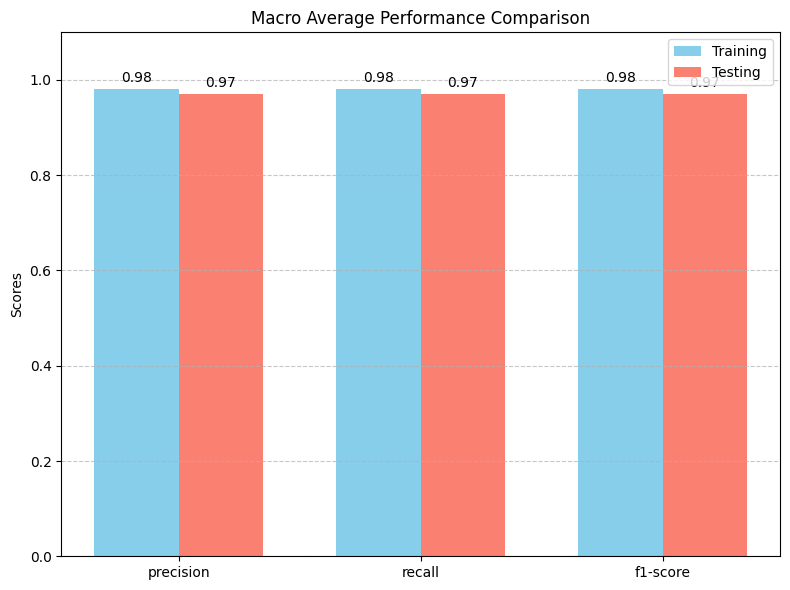

In [43]:
# Select only the main average metrics
metrics = ['precision', 'recall', 'f1-score']
labels = ['Training', 'Testing']

# Extract macro average scores
train_scores = df_train.loc['macro avg', metrics]
test_scores = df_test.loc['macro avg', metrics]

# Plotting
x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

# Add labels and formatting
ax.set_ylabel('Scores')
ax.set_title('Macro Average Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


To-Do:
Use the MNIST datasets.

Use the CIFAR10 datasets.

*Record the accuracy corresponding to the number of epochs 5, 50, 100.

*Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.

*Use the Fashion MNIST Dataset

*Perform and Plot the Comparative Analysis.


In [44]:
# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


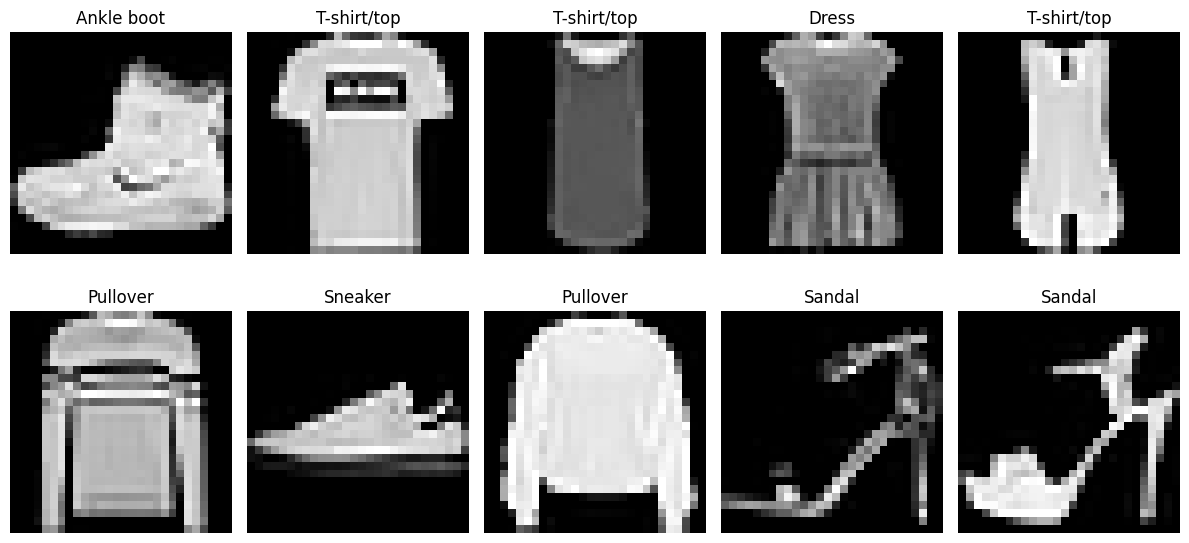

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.7693 - loss: 0.6432 - val_accuracy: 0.8469 - val_loss: 0.4269
Epoch 2/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8523 - loss: 0.3946 - val_accuracy: 0.8556 - val_loss: 0.4004
Epoch 3/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8709 - loss: 0.3504 - val_accuracy: 0.8676 - val_loss: 0.3663
Epoch 4/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8798 - loss: 0.3236 - val_accuracy: 0.8586 - val_loss: 0.3960
Epoch 5/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8849 - loss: 0.3102 - val_accuracy: 0.8622 - val_loss: 0.3779
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model Summary:


Model: "DFF-FashionMNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.90      0.82      6000
     Trouser       0.98      0.98      0.98      6000
    Pullover       0.70      0.84      0.76      6000
       Dress       0.88      0.90      0.89      6000
        Coat       0.85      0.68      0.76      6000
      Sandal       0.98      0.96      0.97      6000
       Shirt       0.74      0.58      0.65      6000
     Sneaker       0.94      0.98      0.96      6000
         Bag       0.98      0.97      0.98      6000
  Ankle boot       0.98      0.95      0.97      6000

    accuracy                           0.87     60000
   macro avg       0.88      0.87      0.87     60000
weighted avg       0.88      0.87      0.87     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

 T-shirt/top       0.73      0.88      0.80      1000
     Trouser       0.97      0.9

In [45]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 items in the training set and their true labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n], cmap='gray')
        axs[i, j].set(title=class_names[y_train[n]])
        axs[i, j].axis('off')
        n += 1
plt.show()

# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print new shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep Feedforward Neural Network (DFF) architecture
model = Sequential(name="DFF-FashionMNIST")
model.add(Input(shape=(784,), name='Input-Layer'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1, validation_split=0.2, shuffle=True)

# Make predictions
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Summary
print("\nModel Summary:")
model.summary()

# Evaluation on Training Data
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr, target_names=class_names))

# Evaluation on Test Data
print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te, target_names=class_names))



In [46]:
# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8917 - loss: 0.2890 - val_accuracy: 0.8797 - val_loss: 0.3394
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8927 - loss: 0.2809 - val_accuracy: 0.8798 - val_loss: 0.3295
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8961 - loss: 0.2716 - val_accuracy: 0.8725 - val_loss: 0.3598
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9022 - loss: 0.2587 - val_accuracy: 0.8811 - val_loss: 0.3454
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9030 - loss: 0.2585 - val_accuracy: 0.8861 - val_loss: 0.3379
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9054 - loss: 0.2505 - val_accuracy: 0.8898 - val_loss: 0.3235
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9080 - loss: 0.2408 - val_accuracy: 0.8772 - val_loss: 0.3839
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9106 - loss: 0

In [47]:
# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=15, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9178 - loss: 0.2171 - val_accuracy: 0.8892 - val_loss: 0.3321
Epoch 2/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9178 - loss: 0.2136 - val_accuracy: 0.8783 - val_loss: 0.3838
Epoch 3/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9173 - loss: 0.2153 - val_accuracy: 0.8881 - val_loss: 0.3596
Epoch 4/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9248 - loss: 0.1994 - val_accuracy: 0.8873 - val_loss: 0.3500
Epoch 5/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9239 - loss: 0.2012 - val_accuracy: 0.8907 - val_loss: 0.3703
Epoch 6/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9241 - loss: 0.1963 - val_accuracy: 0.8857 - val_loss: 0.3860
Epoch 7/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9264 - loss: 0.1969 - val_accuracy: 0.8894 - val_loss: 0.3675
Epoch 8/15
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9264 - loss: 0

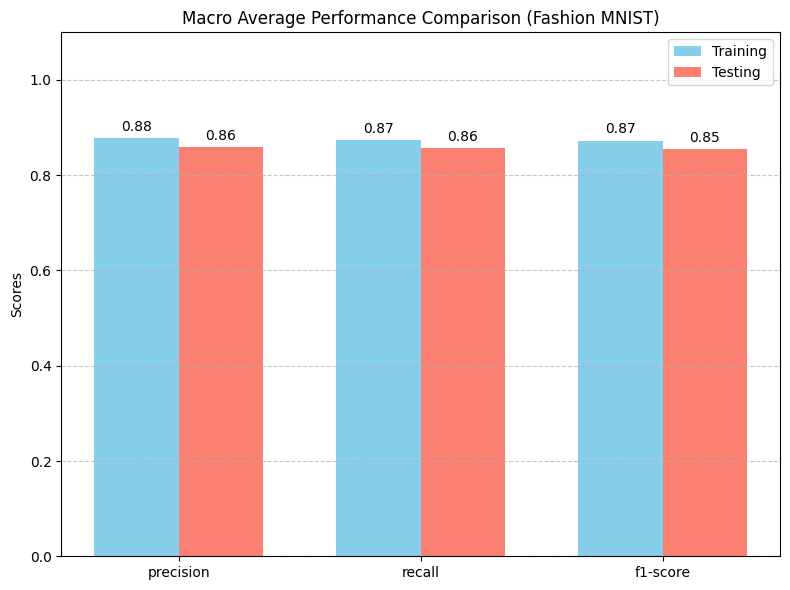

In [48]:

# Generate classification reports as dictionaries
report_train = classification_report(y_train, pred_labels_tr, target_names=class_names, output_dict=True)
report_test = classification_report(y_test, pred_labels_te, target_names=class_names, output_dict=True)

# Convert to DataFrames
df_train = pd.DataFrame(report_train).transpose()
df_test = pd.DataFrame(report_test).transpose()

# Select only the main average metrics
metrics = ['precision', 'recall', 'f1-score']
labels = ['Training', 'Testing']

# Extract macro average scores
train_scores = df_train.loc['macro avg', metrics]
test_scores = df_test.loc['macro avg', metrics]

# Plotting
x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

# Add labels and formatting
ax.set_ylabel('Scores')
ax.set_title('Macro Average Performance Comparison (Fashion MNIST)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)  # Set upper limit slightly above 1
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000,)


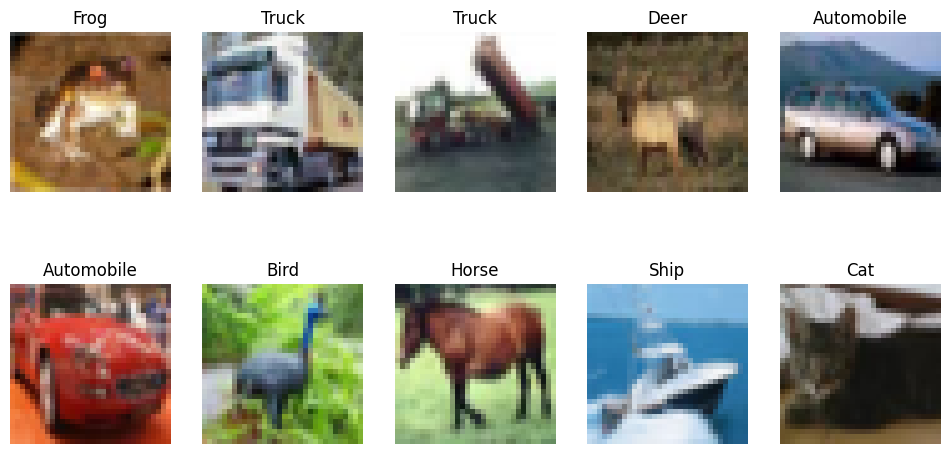

New shape of X_train: (50000, 3072)
New shape of X_test: (10000, 3072)
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.2535 - loss: 2.0647 - val_accuracy: 0.3668 - val_loss: 1.7630
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.3818 - loss: 1.7184 - val_accuracy: 0.3689 - val_loss: 1.7511
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.4149 - loss: 1.6291 - val_accuracy: 0.4230 - val_loss: 1.6182
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.4352 - loss: 1.5654 - val_accuracy: 0.4343 - val_loss: 1.5856
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.4542 - loss: 1.5207 - val_accuracy: 0.4430 - val_loss: 1.5691
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4646 - loss: 1.4940 - val_accuracy: 0.4513 - val_loss: 1.5430
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.4774 - loss: 1.4491 - val_accuracy: 0.4496 - val_loss: 1.5578
Epoch

Model: "DFF-CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,216,672 (19.90 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,477,782 (13.27 MB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

    Airplane       0.73      0.46      0.56      5000
  Automobile       0.64      0.73      0.69      5000
        Bird       0.47      0.37      0.42      5000
         Cat       0.37      0.47      0.41      5000
        Deer       0.44      0.50      0.47      5000
         Dog       0.48      0.38      0.42      5000
        Frog       0.48      0.70      0.57      5000
       Horse       0.65      0.61      0.63      5000
        Ship       0.63      0.73      0.68      5000
       Truck       0.70      0.48      0.57      5000

    accuracy                           0.54     50000
   macro avg       0.56      0.54      0.54     50000
weighted avg       0.56      0.54      0.54     50000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

    Airplane       0.68      0.42      0.52      1000
  Automobile       0.58      0.6

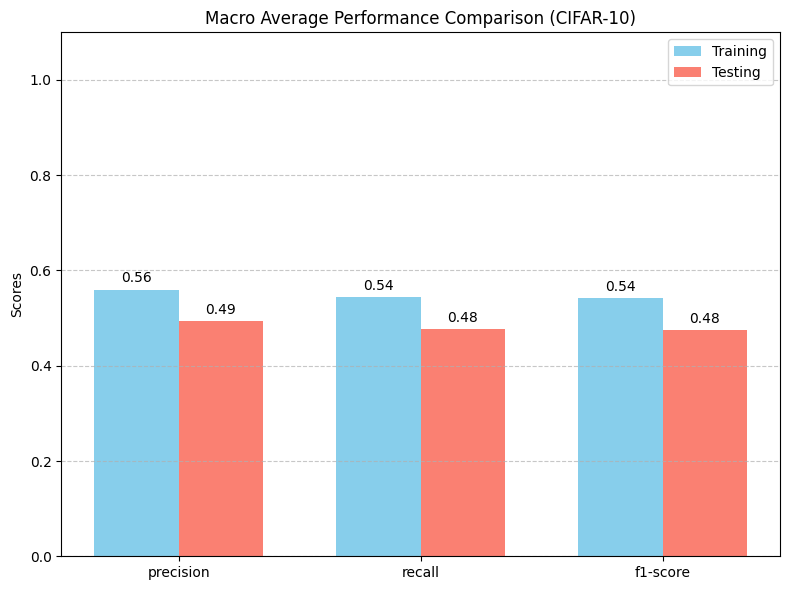

In [50]:

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten label arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display first 10 CIFAR-10 images
fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n])
        axs[i, j].set(title=class_names[y_train[n]])
        axs[i, j].axis('off')
        n += 1
plt.show()

# Reshape and normalize input data (flatten 32x32x3 to 3072 and normalize)
X_train = X_train.reshape(50000, 3072).astype("float32") / 255
X_test = X_test.reshape(10000, 3072).astype("float32") / 255

# Print new shapes
print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

# Define the DFF model
model = Sequential(name="DFF-CIFAR10")
model.add(Input(shape=(3072,), name='Input-Layer'))
model.add(Dense(512, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(256, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.2, shuffle=True)

# Predict labels
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Summary
print("\nModel Summary:")
model.summary()

# Evaluation
print("\n---------- Evaluation on Training Data -----------")
report_train = classification_report(y_train, pred_labels_tr, target_names=class_names, output_dict=True)
print(classification_report(y_train, pred_labels_tr, target_names=class_names))

print("\n---------- Evaluation on Test Data -----------")
report_test = classification_report(y_test, pred_labels_te, target_names=class_names, output_dict=True)
print(classification_report(y_test, pred_labels_te, target_names=class_names))

# Plot Macro Average Comparison
df_train = pd.DataFrame(report_train).transpose()
df_test = pd.DataFrame(report_test).transpose()

metrics = ['precision', 'recall', 'f1-score']
train_scores = df_train.loc['macro avg', metrics]
test_scores = df_test.loc['macro avg', metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Macro Average Performance Comparison (CIFAR-10)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

